輸入立委臉書粉專內容及選舉政見資料

In [4]:
import pandas as pd
fb = pd.read_csv('nysu_10902_2019_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

以新北市立委余天為例，依照月份來統計數值資料的變化

In [5]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [14]:
wu = fb[fb.page_name == "吳秉叡"]
wu.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26375,154631861234059_2254345517929339,154631861234059,吳秉叡,政治人物,1/17(四)到1/20(日)上午，大秉將於新莊各大市場向各位拜年並贈送春聯，喜歡可愛的【金...,NaN,photo,https://www.facebook.com/154631861234059/posts...,2019-01-15T08:02:58+0000,2019-01-15T16:02:58,...,NaN,NaN,996,0,0,0,0,0,17,18


In [15]:
wu[wu.created_time_taipei == max(wu.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26380,154631861234059_2916369525060265,154631861234059,吳秉叡,政治人物,NaN,NaN,photo,https://www.facebook.com/Wubray/photos/a.35703...,2020-01-01T01:20:24+0000,2020-01-01T09:20:24,...,動態時報相片,NaN,11,0,0,0,0,0,0,0


In [16]:
wu[wu.created_time_taipei == min(wu.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26379,154631861234059_2236975949666296,154631861234059,吳秉叡,政治人物,昨天中國國家主席習近平定調九二共識就是「一個中國」、「一國兩制」，打破藍營政治人物長年來說九...,NaN,photo,https://www.facebook.com/154631861234059/posts...,2019-01-03T03:54:59+0000,2019-01-03T11:54:59,...,蔡英文 Tsai Ing-wen,我們始終未接受「九二共識」，根本原因就是北京當局所定義的「九二共識」，其實就是「一個中國」、...,467,0,0,0,0,0,16,10


In [17]:
wu['new_date'] = pd.to_datetime(wu['created_time_taipei']).dt.date
wu['month_year'] = pd.to_datetime(wu['new_date']).dt.to_period('M')
wu.head(1)

<ipython-input-17-ce416ef0ba4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date'] = pd.to_datetime(wu['created_time_taipei']).dt.date
<ipython-input-17-ce416ef0ba4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['month_year'] = pd.to_datetime(wu['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26375,154631861234059_2254345517929339,154631861234059,吳秉叡,政治人物,1/17(四)到1/20(日)上午，大秉將於新莊各大市場向各位拜年並贈送春聯，喜歡可愛的【金...,NaN,photo,https://www.facebook.com/154631861234059/posts...,2019-01-15T08:02:58+0000,2019-01-15T16:02:58,...,996,0,0,0,0,0,17,18,2019-01-15,2019-01


In [18]:
results = wu.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
month_year,,,,,,,,,
2019-01,2010214196042767,10787,0,0,0,0,0,309,197
2019-02,2010214196042767,11488,0,0,0,0,0,427,162
2019-03,1391686751106531,13456,0,0,0,0,0,604,237
2019-04,1082423028638413,9526,0,0,0,0,0,285,258
2019-05,2010214196042767,12058,0,0,0,0,0,1030,118
2019-06,3092637224681180,21526,0,0,0,0,0,658,590
2019-07,3711164669617416,29795,0,0,0,0,0,861,802
2019-08,5412115143192065,47082,0,0,0,0,0,998,1017
2019-09,4329692114553652,37254,0,0,0,0,0,1218,1266


In [19]:
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,2019-01,2010214196042767,10787,0,0,0,0,0,309,197
1,2019-02,2010214196042767,11488,0,0,0,0,0,427,162
2,2019-03,1391686751106531,13456,0,0,0,0,0,604,237
3,2019-04,1082423028638413,9526,0,0,0,0,0,285,258
4,2019-05,2010214196042767,12058,0,0,0,0,0,1030,118
5,2019-06,3092637224681180,21526,0,0,0,0,0,658,590
6,2019-07,3711164669617416,29795,0,0,0,0,0,861,802
7,2019-08,5412115143192065,47082,0,0,0,0,0,998,1017
8,2019-09,4329692114553652,37254,0,0,0,0,0,1218,1266
9,2019-10,6339906310596419,42705,0,0,0,0,0,1278,863


In [20]:
results['newhead'].map(str)

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

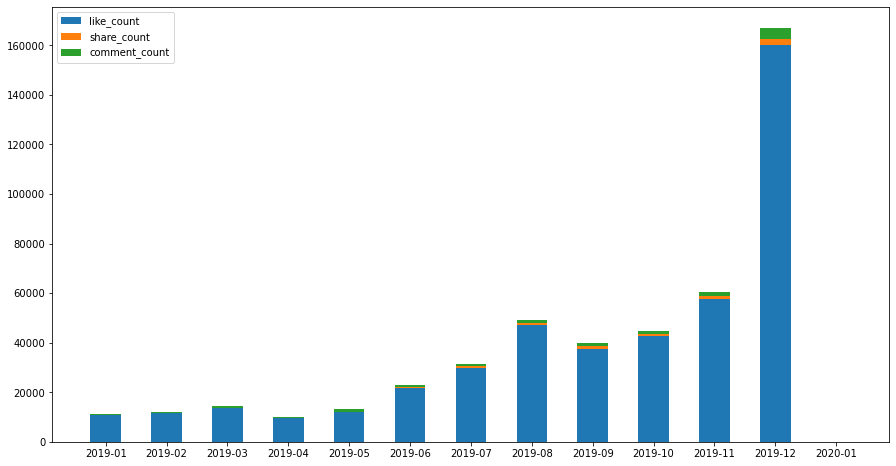

In [22]:
import matplotlib.pyplot as plt

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])

ax.legend()

plt.show()

第十屆立委選舉日，民國109年（2020年）1月11號舉行，選前一個月讚數急速衝高，有除了靠近投票日的原因嗎？

In [24]:
December = wu[wu.month_year == "2019-12"]

In [25]:
results_december = December.groupby('new_date').sum()
results_december

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-12-01,463895583702177,14801,0,0,0,0,0,365,164
2019-12-02,309263722468118,5018,0,0,0,0,0,137,88
2019-12-03,309263722468118,1779,0,0,0,0,0,57,57
2019-12-04,309263722468118,6850,0,0,0,0,0,198,145
2019-12-05,309263722468118,2379,0,0,0,0,0,67,32
2019-12-06,463895583702177,2430,0,0,0,0,0,56,52
2019-12-07,309263722468118,1512,0,0,0,0,0,60,40
2019-12-08,154631861234059,601,0,0,0,0,0,25,17
2019-12-09,309263722468118,5707,0,0,0,0,0,148,61


In [33]:
results_december.index.name = 'newhead'
results_december.reset_index(inplace=True)
results_december

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,2019-12-01,463895583702177,14801,0,0,0,0,0,365,164
1,2019-12-02,309263722468118,5018,0,0,0,0,0,137,88
2,2019-12-03,309263722468118,1779,0,0,0,0,0,57,57
3,2019-12-04,309263722468118,6850,0,0,0,0,0,198,145
4,2019-12-05,309263722468118,2379,0,0,0,0,0,67,32
5,2019-12-06,463895583702177,2430,0,0,0,0,0,56,52
6,2019-12-07,309263722468118,1512,0,0,0,0,0,60,40
7,2019-12-08,154631861234059,601,0,0,0,0,0,25,17
8,2019-12-09,309263722468118,5707,0,0,0,0,0,148,61
9,2019-12-10,309263722468118,3642,0,0,0,0,0,81,67


No handles with labels found to put in legend.


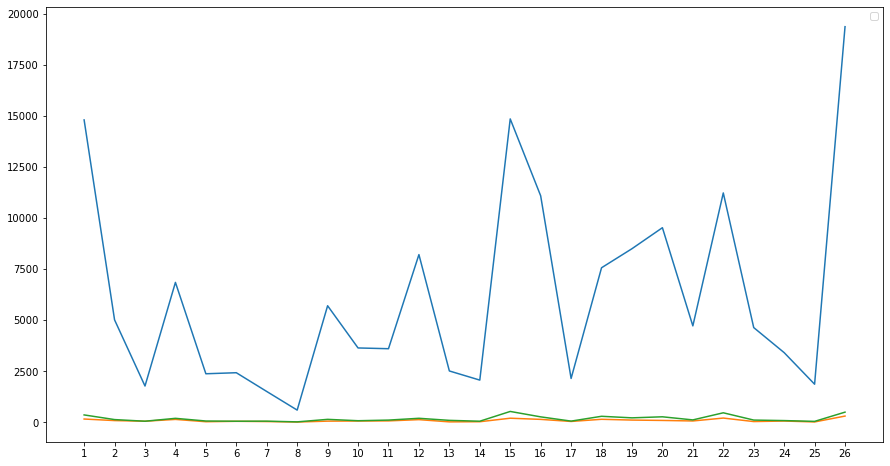

In [35]:
labels = [str(i) for i in range(1,27)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_december['like_count'])
ax.plot(labels, results_december['share_count'])
ax.plot(labels, results_december['comment_count'])

ax.legend()

plt.show()

2019年12月1日、15日、16日、22日、26日的文章，高關注內容為何？

In [36]:
wu['new_date']=wu['new_date'].map(str)
wu[wu['new_date'] == "2019-12-01"]

<ipython-input-36-c7b72a6ebcd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date']=wu['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26639,154631861234059_2845884475442104,154631861234059,吳秉叡,政治人物,今天小英新北競總大會盛大舉行， 蔡英文 Tsai Ing-wen總統、 陳建仁 Chen C...,吳秉叡──和吳秉叡及其他 3 人。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-01T13:40:44+0000,2019-12-01T21:40:44,...,12134,0,0,0,0,0,203,110,2019-12-01,2019-12
26640,154631861234059_769529693566788,154631861234059,吳秉叡,政治人物,📣直播開始囉📣\n請所有新北的好朋友在線上與我們一起逛園遊會吧🎪\n\n👉小額捐款點這邊：h...,吳秉叡的直播影片。,video,https://www.facebook.com/Wubray/videos/7695296...,2019-12-01T05:52:36+0000,2019-12-01T13:52:36,...,1124,0,0,0,0,0,137,45,2019-12-01,2019-12
26641,154631861234059_2843870815643470,154631861234059,吳秉叡,政治人物,📢直播預告📢\n今天下午一點小英新北競總(小英咖啡)☕️將舉行盛大開幕典禮，我們精心準備了有...,NaN,photo,https://www.facebook.com/154631861234059/posts...,2019-12-01T01:00:31+0000,2019-12-01T09:00:31,...,1543,0,0,0,0,0,25,9,2019-12-01,2019-12


In [37]:
temp = wu[wu['new_date'] == "2019-12-01"]
temp[temp.like_count == max(temp.like_count)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26639,154631861234059_2845884475442104,154631861234059,吳秉叡,政治人物,今天小英新北競總大會盛大舉行， 蔡英文 Tsai Ing-wen總統、 陳建仁 Chen C...,吳秉叡──和吳秉叡及其他 3 人。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-01T13:40:44+0000,2019-12-01T21:40:44,...,12134,0,0,0,0,0,203,110,2019-12-01,2019-12


In [38]:
temp[temp.like_count == min(temp.like_count)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26640,154631861234059_769529693566788,154631861234059,吳秉叡,政治人物,📣直播開始囉📣\n請所有新北的好朋友在線上與我們一起逛園遊會吧🎪\n\n👉小額捐款點這邊：h...,吳秉叡的直播影片。,video,https://www.facebook.com/Wubray/videos/7695296...,2019-12-01T05:52:36+0000,2019-12-01T13:52:36,...,1124,0,0,0,0,0,137,45,2019-12-01,2019-12


12月1日熱門發文為蔡英文新北競總成立

In [40]:
wu['new_date']=wu['new_date'].map(str)
wu[wu['new_date'] == "2019-12-15"]

<ipython-input-40-fc068dedd07b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date']=wu['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26680,154631861234059_2878500665513818,154631861234059,吳秉叡,政治人物,今天總統蔡英文、立委吳秉叡北新莊競選總部成立大會順利成功，感謝 賴清德院長、 蘇貞昌院長、 ...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-15T10:43:25+0000,2019-12-15T18:43:25,...,8353,0,0,0,0,0,210,100,2019-12-15,2019-12
26682,154631861234059_454910018441107,154631861234059,吳秉叡,政治人物,"抱歉剛才訊號問題小中斷, 請大家繼續來這篇看直播哦!!\n\n2020 台灣要贏 新莊先贏\...",吳秉叡的直播影片。,video,https://www.facebook.com/Wubray/videos/4549100...,2019-12-15T09:05:26+0000,2019-12-15T17:05:26,...,1922,0,0,0,0,0,60,26,2019-12-15,2019-12
26684,154631861234059_449413125756475,154631861234059,吳秉叡,政治人物,2020 台灣要贏 新莊先贏\n北新莊競選總部成立大會開始囉！\n趕快來現場一起為台灣加油!...,吳秉叡的直播影片。,video,https://www.facebook.com/Wubray/videos/4494131...,2019-12-15T06:49:31+0000,2019-12-15T14:49:31,...,2261,0,0,0,0,0,166,41,2019-12-15,2019-12
26685,154631861234059_2876665669030651,154631861234059,吳秉叡,政治人物,📣新莊的鄉親看過來📣\n今天下午兩點半， 北新莊競選總部成立大會盛大舉辦，除了有精采節目表演...,NaN,photo,https://www.facebook.com/154631861234059/posts...,2019-12-15T01:20:36+0000,2019-12-15T09:20:36,...,2314,0,0,0,0,0,99,37,2019-12-15,2019-12


In [41]:
temp = wu[wu['new_date'] == "2019-12-15"]
temp[temp.like_count == max(temp.like_count)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26680,154631861234059_2878500665513818,154631861234059,吳秉叡,政治人物,今天總統蔡英文、立委吳秉叡北新莊競選總部成立大會順利成功，感謝 賴清德院長、 蘇貞昌院長、 ...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-15T10:43:25+0000,2019-12-15T18:43:25,...,8353,0,0,0,0,0,210,100,2019-12-15,2019-12


12月15日熱門文章為蔡英文與吳秉叡北新莊競總成立

In [42]:
wu['new_date']=wu['new_date'].map(str)
wu[wu['new_date'] == "2019-12-16"]

<ipython-input-42-9f96a47229c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date']=wu['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26678,154631861234059_2880162658680952,154631861234059,吳秉叡,政治人物,錯過了昨天與六千位鄉親一同相挺好立委的盛事嗎？ 這週日讓我們為新莊再站出來一回！\n\n#台...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-16T04:14:14+0000,2019-12-16T12:14:14,...,8323,0,0,0,0,0,170,102,2019-12-16,2019-12
26679,154631861234059_2877653138931904,154631861234059,吳秉叡,政治人物,【回顧政績，努力向前】\n\n改善交通-串聯大漢溪左岸堤外便道，多一條安全便利回家的路\n\...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-16T00:00:36+0000,2019-12-16T08:00:36,...,1542,0,0,0,0,0,46,19,2019-12-16,2019-12
26681,154631861234059_2880384611992090,154631861234059,吳秉叡,政治人物,昨天北新莊競選總部成立大會圓滿成功，超過六千位民眾到場為秉叡加油，用行動訴求新莊需要一位會做...,吳秉叡新增了 17 張相片 — 和蘇貞昌及其他 2 人，在新莊體育館前廣場。,photo,https://www.facebook.com/Wubray/photos/a.28803...,2019-12-16T06:28:49+0000,2019-12-16T14:28:49,...,611,0,0,0,0,0,27,13,2019-12-16,2019-12
26683,154631861234059_2880384645325420,154631861234059,吳秉叡,政治人物,昨天北新莊競選總部成立大會圓滿成功，超過六千位民眾到場為秉叡加油，用行動訴求新莊需要一位會做...,吳秉叡新增了 30 張相片 — 和吳秉叡在新莊體育館前廣場。,photo,https://www.facebook.com/Wubray/photos/a.28803...,2019-12-16T06:28:46+0000,2019-12-16T14:28:46,...,611,0,0,0,0,0,27,13,2019-12-16,2019-12


In [43]:
temp = wu[wu['new_date'] == "2019-12-16"]
temp[temp.like_count == max(temp.like_count)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26678,154631861234059_2880162658680952,154631861234059,吳秉叡,政治人物,錯過了昨天與六千位鄉親一同相挺好立委的盛事嗎？ 這週日讓我們為新莊再站出來一回！\n\n#台...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-16T04:14:14+0000,2019-12-16T12:14:14,...,8323,0,0,0,0,0,170,102,2019-12-16,2019-12


12月16日熱門發文為呼籲民眾參加競選活動

In [44]:
wu['new_date']=wu['new_date'].map(str)
wu[wu['new_date'] == "2019-12-22"]

<ipython-input-44-e2857e7c01a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date']=wu['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26657,154631861234059_2894168503947034,154631861234059,吳秉叡,政治人物,今日總統蔡英文、立委吳秉叡南新莊競選總部成立大會順利成功，感謝 陳建仁 Chen Chien...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-22T11:28:35+0000,2019-12-22T19:28:35,...,6832,0,0,0,0,0,137,88,2019-12-22,2019-12
26658,154631861234059_470887963607265,154631861234059,吳秉叡,政治人物,📣直播開始囉，就等你上線📣\n\n2020 台灣要贏 新莊先贏\n南新莊競選總部成立大會開始...,吳秉叡的直播影片。,video,https://www.facebook.com/Wubray/videos/4708879...,2019-12-22T05:10:24+0000,2019-12-22T13:10:24,...,2088,0,0,0,0,0,253,73,2019-12-22,2019-12
26659,154631861234059_589921018489077,154631861234059,吳秉叡,政治人物,選戰倒數20天，現在陳建仁副總統以及賴清德副總統候選人，將領軍陪同我們雙北的立委候選人進行車...,吳秉叡的直播影片。,video,https://www.facebook.com/Wubray/videos/5899210...,2019-12-22T01:29:29+0000,2019-12-22T09:29:29,...,704,0,0,0,0,0,34,14,2019-12-22,2019-12
26660,154631861234059_2889060701124481,154631861234059,吳秉叡,政治人物,📣新莊的鄉親看過來📣\n今天下午兩點半， 南新莊競選總部成立大會盛大舉辦，除了有精采節目表演...,NaN,photo,https://www.facebook.com/154631861234059/posts...,2019-12-22T01:00:13+0000,2019-12-22T09:00:13,...,1604,0,0,0,0,0,45,36,2019-12-22,2019-12


In [45]:
temp = wu[wu['new_date'] == "2019-12-22"]
temp[temp.like_count == max(temp.like_count)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26657,154631861234059_2894168503947034,154631861234059,吳秉叡,政治人物,今日總統蔡英文、立委吳秉叡南新莊競選總部成立大會順利成功，感謝 陳建仁 Chen Chien...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-22T11:28:35+0000,2019-12-22T19:28:35,...,6832,0,0,0,0,0,137,88,2019-12-22,2019-12


12月22日熱門發文為蔡英文、吳秉叡南新莊競總成立

In [46]:
wu['new_date']=wu['new_date'].map(str)
wu[wu['new_date'] == "2019-12-26"]

<ipython-input-46-57f523fb3b78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date']=wu['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26648,154631861234059_2903081099722441,154631861234059,吳秉叡,政治人物,📣小英總統來囉📣\n選前黃金週，蔡英文總統將到新莊運動公園陽光草坪與鄉親們見面，邀請所有支持...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-26T09:00:41+0000,2019-12-26T17:00:41,...,18460,0,0,0,0,0,447,281,2019-12-26,2019-12
26649,154631861234059_2902643693099515,154631861234059,吳秉叡,政治人物,【大秉胖卡 巡迴任務】\n可愛的大餅胖卡來了👏\n近期是流感好發期，民眾出門在外要注意身體健...,NaN,photo,https://www.facebook.com/154631861234059/posts...,2019-12-26T06:00:24+0000,2019-12-26T14:00:24,...,332,0,0,0,0,0,18,6,2019-12-26,2019-12
26650,154631861234059_855897868199091,154631861234059,吳秉叡,政治人物,<直播開始囉、一起吃早餐>\n九點了，來和秉叡、林楚茵 、顏若芳 一起吃早餐吧！營養美味、份...,吳秉叡的直播影片。,video,https://www.facebook.com/Wubray/videos/8558978...,2019-12-26T01:00:15+0000,2019-12-26T09:00:15,...,571,0,0,0,0,0,36,22,2019-12-26,2019-12


In [47]:
temp = wu[wu['new_date'] == "2019-12-26"]
temp[temp.like_count == max(temp.like_count)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26648,154631861234059_2903081099722441,154631861234059,吳秉叡,政治人物,📣小英總統來囉📣\n選前黃金週，蔡英文總統將到新莊運動公園陽光草坪與鄉親們見面，邀請所有支持...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-26T09:00:41+0000,2019-12-26T17:00:41,...,18460,0,0,0,0,0,447,281,2019-12-26,2019-12


In [ ]:
results_feb = liu[liu.month_year == "2019-02"].groupby('new_date').sum()
results_feb[results_feb.like_count == min(results_feb.like_count)]

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-02-11,213939351983587,218,0,0,0,0,0,17,13


12月26日熱門發文為選前黃金週催票

In [49]:
pd.set_option('display.max_colwidth', None)
showlink = wu[wu.new_date == "2019-12-26"].permalink.to_string()
print(showlink)

26648    https://www.facebook.com/154631861234059/posts/2903081099722441/
26649    https://www.facebook.com/154631861234059/posts/2902643693099515/
26650             https://www.facebook.com/Wubray/videos/855897868199091/


In [51]:
print(politics[politics.姓名 == "吳 秉 叡"].政見.to_string())

13    臺灣現正面臨貧富差距擴大、食品安全風暴、財政惡化、民主倒退等嚴峻挑戰，為爭取安心安全、永續經營、公平正義的未來，吳秉叡將秉持專業立法、有效監督， 落實下列目標： 一、回歸人民的司法改革：建立人民參與審判的機制，檢討司法人員任用及淘汰機制，全面檢討違反「刑事人權保障」的制度與運作，推動國家轉型正義，並建立合 乎憲政本旨的違憲審查機制，落實司法為民、司法公正。 二、安全永續的社會制度：推動食品、住宅、照護的社會安全計畫，監督保障食品安全，推動公平合理的公共住宅，落實平價優質的社區長期照護，改革安全永續的 年金制度。 三、在地就業的創意經濟：結合在地文創與知識科研，促進產業結構升級，創造在地就業機會，並落實勞工權益保障。 四、合理效率的財稅制度：減少政府財政浪費，續推稅賦改革、促進稅制公平，照顧弱勢族群。 五、永續發展的綠色家園：監督落實非核家園，推動潔淨能源與環境保護，促進台灣綠色產業，實現永續發展的綠色家園。 六、永續深化的民主改革：推動憲政改革、修正「鳥籠式」公投法，並制定「政黨法」及「不當黨產處理條例」，落實還權於民，擴大人民監督，並建構權責相符的 政府。
